<a href="https://colab.research.google.com/github/utsav-195/multilabel-classification-of-toxic-comments-using-deep-learning/blob/main/Toxic_Comment_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip "/content/drive/MyDrive/uic/Toxic Comments/jigsaw-toxic-comment-classification-challenge.zip" -d "/content/drive/MyDrive/uic/Toxic Comments/Data/"

Archive:  /content/drive/MyDrive/uic/Toxic Comments/jigsaw-toxic-comment-classification-challenge.zip
  inflating: /content/drive/MyDrive/uic/Toxic Comments/Data/sample_submission.csv.zip  
  inflating: /content/drive/MyDrive/uic/Toxic Comments/Data/test.csv.zip  
  inflating: /content/drive/MyDrive/uic/Toxic Comments/Data/test_labels.csv.zip  
  inflating: /content/drive/MyDrive/uic/Toxic Comments/Data/train.csv.zip  


In [ ]:
!mkdir "/content/drive/MyDrive/uic/Toxic Comments/Data/test/"

In [ ]:
!unzip "/content/drive/MyDrive/uic/Toxic Comments/Data/test_labels.csv.zip" -d "/content/drive/MyDrive/uic/Toxic Comments/Data/test/"

Archive:  /content/drive/MyDrive/uic/Toxic Comments/Data/test_labels.csv.zip
  inflating: /content/drive/MyDrive/uic/Toxic Comments/Data/test/test_labels.csv  


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/uic/Toxic Comments/Data/train/train.csv")

In [ ]:
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
data.shape

(159571, 8)

## Data Pre-Processing and Exploration

In [ ]:
data = data.drop("id",axis=1)

In [ ]:
data["character_length"]=data.comment_text.apply(lambda x:len(x))

In [ ]:
data.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,character_length
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67


In [ ]:
counts = {}
for c in data.character_length:
  if c in counts:
    counts[c] += 1
  else:
    counts[c] = 1

In [ ]:
print(max(data.character_length))
print(min(data.character_length))

5000
6


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


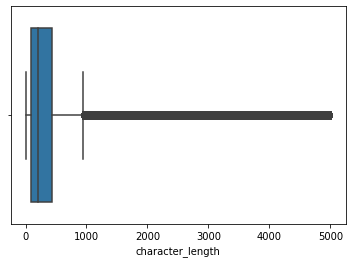

In [ ]:
sns.boxplot(data.character_length)

In [ ]:
np.median(data.character_length)

205.0

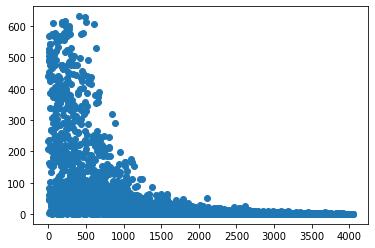

In [ ]:
plt.scatter(range(0,len(counts)),counts.values())

In [51]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",

                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",

                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",

                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",

                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",

                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",

                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",

                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",

                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",

                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",

                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",

                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",

                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",

                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",

                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",

                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",

                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",

                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",

                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",

                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",

                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",

                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",

                           "you're": "you are", "you've": "you have","u":"you","ur":"you are","u.s":"US","u.s.":"US"}

In [52]:
def process(df):
  tokens = []
  for d in df:
    d = d.lower().replace("\\n"," ")
    d = d.replace("?"," ? ")
    d = d.replace("."," . ")
    d = d.replace("!"," ! ")
    d = d.replace(","," , ")
    d = d.replace("("," ( ")
    d = d.replace(")"," ) ")
    d = d.replace("]"," ] ")
    d = d.replace("["," [ ")
    d = d.replace(":"," : ")
    d = d.replace("-"," - ")
    new_d = []
    for i in d.split():
      if i in contraction_mapping:
        mapping = contraction_mapping[i]
        new_d.append(mapping)
      else:
        new_d.append(i)
    new_d = [n for n in new_d if n != ""]
    new_d = " ".join(new_d)
    tokens.append(new_d)
  return tokens

In [ ]:
cleaned_data = process(data.comment_text)

In [ ]:
data["cleaned_comments"] = cleaned_data

In [ ]:
data.cleaned_comments

0         explanation why the edits made under my userna...
1         d'aww ! he matches this background colour i am...
2         hey man , i am really not trying to edit war ....
3         " more i cannot make any real suggestions on i...
4         you , sir , are my hero . any chance you remem...
                                ...                        
159566    " : : : : : and for the second time of asking ...
159567    you should be ashamed of yourself that is a ho...
159568    spitzer umm , theres no actual article for pro...
159569    and it looks like it was actually you who put ...
159570    " and . . . i really do not think you understa...
Name: cleaned_comments, Length: 159571, dtype: object

In [ ]:
data["num_tokens"] = data.cleaned_comments.apply(lambda x:len(x.split()))

In [ ]:
data.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,character_length,cleaned_comments,num_tokens
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264,explanation why the edits made under my userna...,57
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112,d'aww ! he matches this background colour i am...,29
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233,"hey man , i am really not trying to edit war ....",48
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622,""" more i cannot make any real suggestions on i...",124
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67,"you , sir , are my hero . any chance you remem...",18


In [ ]:
np.median(data.num_tokens)

43.0

In [ ]:
labels = []

for i in range(data.shape[0]):
  labels.append([data.iloc[i,1],data.iloc[i,2],data.iloc[i,3],data.iloc[i,4],data.iloc[i,5],data.iloc[i,6]])
data["labels"] = labels

In [ ]:
data.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,character_length,cleaned_comments,num_tokens,labels
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264,explanation why the edits made under my userna...,57,"[0, 0, 0, 0, 0, 0]"
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112,d'aww ! he matches this background colour i am...,29,"[0, 0, 0, 0, 0, 0]"
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233,"hey man , i am really not trying to edit war ....",48,"[0, 0, 0, 0, 0, 0]"
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622,""" more i cannot make any real suggestions on i...",124,"[0, 0, 0, 0, 0, 0]"
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67,"you , sir , are my hero . any chance you remem...",18,"[0, 0, 0, 0, 0, 0]"


In [ ]:
binary_labels = []

binary_sum = [(data.toxic[i]+data.severe_toxic[i]+data.obscene[i]+data.threat[i]+data.insult[i]+data.identity_hate[i]) for i in range(data.shape[0])]

In [ ]:
data["binary_sum"] = binary_sum

In [ ]:
data['binary_labels'] = data["binary_sum"].apply(lambda x: 1 if x > 0 else x)

In [ ]:
data.head(10)

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,character_length,cleaned_comments,num_tokens,labels,binary_sum,binary_labels
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264,explanation why the edits made under my userna...,57,"[0, 0, 0, 0, 0, 0]",0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112,d'aww ! he matches this background colour i am...,29,"[0, 0, 0, 0, 0, 0]",0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233,"hey man , i am really not trying to edit war ....",48,"[0, 0, 0, 0, 0, 0]",0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622,""" more i cannot make any real suggestions on i...",124,"[0, 0, 0, 0, 0, 0]",0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67,"you , sir , are my hero . any chance you remem...",18,"[0, 0, 0, 0, 0, 0]",0,0
5,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,65,""" congratulations from me as well , use the to...",15,"[0, 0, 0, 0, 0, 0]",0,0
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,44,cocksucker before you piss around on my work,8,"[1, 1, 1, 0, 1, 0]",4,1
7,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,115,your vandalism to the matt shirvington article...,24,"[0, 0, 0, 0, 0, 0]",0,0
8,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,472,sorry if the word 'nonsense' was offensive to ...,102,"[0, 0, 0, 0, 0, 0]",0,0
9,alignment on this subject and which are contra...,0,0,0,0,0,0,70,alignment on this subject and which are contra...,12,"[0, 0, 0, 0, 0, 0]",0,0


In [ ]:
final_train_data = data[["cleaned_comments","binary_labels","labels"]]

In [ ]:
final_train_data.head()

,cleaned_comments,binary_labels,labels
0,explanation why the edits made under my userna...,0,"[0, 0, 0, 0, 0, 0]"
1,d'aww ! he matches this background colour i am...,0,"[0, 0, 0, 0, 0, 0]"
2,"hey man , i am really not trying to edit war ....",0,"[0, 0, 0, 0, 0, 0]"
3,""" more i cannot make any real suggestions on i...",0,"[0, 0, 0, 0, 0, 0]"
4,"you , sir , are my hero . any chance you remem...",0,"[0, 0, 0, 0, 0, 0]"


In [ ]:
final_train_data.to_csv("/content/drive/MyDrive/uic/Toxic Comments/Data/train/cleaned_train.csv",index=False)

### Test Data

In [75]:
data_test = pd.read_csv("/content/drive/MyDrive/uic/Toxic Comments/Data/test/test.csv")

In [76]:
data_test_labels = pd.read_csv("/content/drive/MyDrive/uic/Toxic Comments/Data/test/test_labels.csv")

In [77]:
data_test.head(10)

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
5,0001ea8717f6de06,Thank you for understanding. I think very high...
6,00024115d4cbde0f,Please do not add nonsense to Wikipedia. Such ...
7,000247e83dcc1211,:Dear god this site is horrible.
8,00025358d4737918,""" \n Only a fool can believe in such numbers. ..."
9,00026d1092fe71cc,== Double Redirects == \n\n When fixing double...


In [78]:
data_test_labels.head(10)

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1
5,0001ea8717f6de06,0,0,0,0,0,0
6,00024115d4cbde0f,-1,-1,-1,-1,-1,-1
7,000247e83dcc1211,0,0,0,0,0,0
8,00025358d4737918,-1,-1,-1,-1,-1,-1
9,00026d1092fe71cc,-1,-1,-1,-1,-1,-1


In [79]:
data_test = data_test.drop("id",axis=1)
data_test_labels = data_test_labels.drop("id",axis=1)

In [80]:
data_test.shape

(153164, 1)

In [81]:
data_test["cleaned_comments"] = process(data_test.comment_text)

In [82]:
data_test.head()

,comment_text,cleaned_comments
0,Yo bitch Ja Rule is more succesful then you'll...,yo bitch ja rule is more succesful then you wi...
1,== From RfC == \n\n The title is fine as it is...,"== from rfc == the title is fine as it is , imo ."
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",""" == sources == * zawe ashton on lapland — / """
3,":If you have a look back at the source, the in...",": if you have a look back at the source , the ..."
4,I don't anonymously edit articles at all.,i do not anonymously edit articles at all .


In [83]:
data_test = pd.concat([data_test,data_test_labels],axis=1)

In [84]:
data_test.head(10)

,comment_text,cleaned_comments,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Yo bitch Ja Rule is more succesful then you'll...,yo bitch ja rule is more succesful then you wi...,-1,-1,-1,-1,-1,-1
1,== From RfC == \n\n The title is fine as it is...,"== from rfc == the title is fine as it is , imo .",-1,-1,-1,-1,-1,-1
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",""" == sources == * zawe ashton on lapland — / """,-1,-1,-1,-1,-1,-1
3,":If you have a look back at the source, the in...",": if you have a look back at the source , the ...",-1,-1,-1,-1,-1,-1
4,I don't anonymously edit articles at all.,i do not anonymously edit articles at all .,-1,-1,-1,-1,-1,-1
5,Thank you for understanding. I think very high...,thank you for understanding . i think very hig...,0,0,0,0,0,0
6,Please do not add nonsense to Wikipedia. Such ...,please do not add nonsense to wikipedia . such...,-1,-1,-1,-1,-1,-1
7,:Dear god this site is horrible.,: dear god this site is horrible .,0,0,0,0,0,0
8,""" \n Only a fool can believe in such numbers. ...",""" only a fool can believe in such numbers . th...",-1,-1,-1,-1,-1,-1
9,== Double Redirects == \n\n When fixing double...,== double redirects == when fixing double redi...,-1,-1,-1,-1,-1,-1


In [86]:
test_labels = []

for i in range(data_test.shape[0]):
  test_labels.append([data_test.iloc[i,2],data_test.iloc[i,3],data_test.iloc[i,4],data_test.iloc[i,5],data_test.iloc[i,6],data_test.iloc[i,7]])
data_test["labels"] = test_labels

In [87]:
data_test.head()

,comment_text,cleaned_comments,toxic,severe_toxic,obscene,threat,insult,identity_hate,labels
0,Yo bitch Ja Rule is more succesful then you'll...,yo bitch ja rule is more succesful then you wi...,-1,-1,-1,-1,-1,-1,"[-1, -1, -1, -1, -1, -1]"
1,== From RfC == \n\n The title is fine as it is...,"== from rfc == the title is fine as it is , imo .",-1,-1,-1,-1,-1,-1,"[-1, -1, -1, -1, -1, -1]"
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",""" == sources == * zawe ashton on lapland — / """,-1,-1,-1,-1,-1,-1,"[-1, -1, -1, -1, -1, -1]"
3,":If you have a look back at the source, the in...",": if you have a look back at the source , the ...",-1,-1,-1,-1,-1,-1,"[-1, -1, -1, -1, -1, -1]"
4,I don't anonymously edit articles at all.,i do not anonymously edit articles at all .,-1,-1,-1,-1,-1,-1,"[-1, -1, -1, -1, -1, -1]"


In [88]:
binary_labels = []

binary_sum = [(data_test.toxic[i]+data_test.severe_toxic[i]+data_test.obscene[i]+data_test.threat[i]+data_test.insult[i]+data_test.identity_hate[i]) for i in range(data_test.shape[0])]

In [89]:
data_test["binary_sum"] = binary_sum
data_test["binary_labels"] = data_test["binary_sum"].apply(lambda x: 1 if x > 0 else x)

In [96]:
data_test = data_test[data_test["binary_labels"]>-1]

In [97]:
data_test.head()

,comment_text,cleaned_comments,toxic,severe_toxic,obscene,threat,insult,identity_hate,labels,binary_sum,binary_labels
5,Thank you for understanding. I think very high...,thank you for understanding . i think very hig...,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]",0,0
7,:Dear god this site is horrible.,: dear god this site is horrible .,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]",0,0
11,"""::: Somebody will invariably try to add Relig...",""" : : : somebody will invariably try to add re...",0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]",0,0
13,""" \n\n It says it right there that it IS a typ...",""" it says it right there that it is a type . t...",0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]",0,0
14,""" \n\n == Before adding a new product to the l...",""" == before adding a new product to the list ,...",0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]",0,0


In [99]:
final_test_data = data_test[["cleaned_comments","binary_labels","labels"]]

In [100]:
final_test_data.head()

,cleaned_comments,binary_labels,labels
5,thank you for understanding . i think very hig...,0,"[0, 0, 0, 0, 0, 0]"
7,: dear god this site is horrible .,0,"[0, 0, 0, 0, 0, 0]"
11,""" : : : somebody will invariably try to add re...",0,"[0, 0, 0, 0, 0, 0]"
13,""" it says it right there that it is a type . t...",0,"[0, 0, 0, 0, 0, 0]"
14,""" == before adding a new product to the list ,...",0,"[0, 0, 0, 0, 0, 0]"


In [101]:
final_test_data.to_csv("/content/drive/MyDrive/uic/Toxic Comments/Data/test/cleaned_test.csv",index=False)

### train validation split



In [2]:
final_data = pd.read_csv("/content/drive/MyDrive/uic/Toxic Comments/Data/train/cleaned_train.csv")

In [3]:
final_data.head()

,cleaned_comments,binary_labels,labels
0,explanation why the edits made under my userna...,0,"[0, 0, 0, 0, 0, 0]"
1,d'aww ! he matches this background colour i am...,0,"[0, 0, 0, 0, 0, 0]"
2,"hey man , i am really not trying to edit war ....",0,"[0, 0, 0, 0, 0, 0]"
3,""" more i cannot make any real suggestions on i...",0,"[0, 0, 0, 0, 0, 0]"
4,"you , sir , are my hero . any chance you remem...",0,"[0, 0, 0, 0, 0, 0]"


In [4]:
labels = []

In [5]:
for l in final_data.labels:
  labels.append(np.asarray([float(i) for i in l.replace("[","").replace("]","").split(", ")]))

In [6]:
X_train, X_val, y_train, y_val = train_test_split(final_data.cleaned_comments, np.asarray(labels), test_size=0.20, random_state=42)

In [7]:
del final_data

In [8]:
X_train

140030    grandma terri should burn in trash grandma ter...
159124    , 9 may 2009 ( utc ) it would be easiest if yo...
60006     " the objectivity of this discussion is doubtf...
65432                shelly shock shelly shock is . . . ( )
154979    i do not care . refer to ong teng cheong talk ...
                                ...                        
119879    redirect talk : john loveday ( experimental ph...
103694    back it up . post the line here with the refer...
131932    i will not stop that . sometimes germanic equa...
146867    " british bands ? i think you have mistaken sc...
121958    you are wrong . justin thompson is mentioned i...
Name: cleaned_comments, Length: 127656, dtype: object

In [9]:
y_train

array([[1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [102]:
final_test_data = pd.read_csv("/content/drive/MyDrive/uic/Toxic Comments/Data/test/cleaned_test.csv")

In [103]:
final_test_data.head()

,cleaned_comments,binary_labels,labels
0,thank you for understanding . i think very hig...,0,"[0, 0, 0, 0, 0, 0]"
1,: dear god this site is horrible .,0,"[0, 0, 0, 0, 0, 0]"
2,""" : : : somebody will invariably try to add re...",0,"[0, 0, 0, 0, 0, 0]"
3,""" it says it right there that it is a type . t...",0,"[0, 0, 0, 0, 0, 0]"
4,""" == before adding a new product to the list ,...",0,"[0, 0, 0, 0, 0, 0]"


In [108]:
X_test = final_test_data.cleaned_comments

In [104]:
y_test = []
for l in final_test_data.labels:
  y_test.append(np.asarray([float(i) for i in l.replace("[","").replace("]","").split(", ")]))

In [107]:
y_test = np.asarray(y_test)
y_test

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0.]])

## Modeling

In [41]:
from keras import optimizers
from keras.preprocessing.text import one_hot, Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense,LSTM,LeakyReLU
from keras.layers.embeddings import Embedding
from keras.metrics import Recall
from keras.callbacks import ModelCheckpoint

In [11]:
# load the whole embedding into memory
embeddings_index = dict()
f = open('/content/drive/MyDrive/uic/Toxic Comments/Data/glove.6B.300d.txt')
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [12]:
t = Tokenizer()
t.fit_on_texts(X_train)
vocab_size = len(t.word_index) + 1

In [13]:
# integer encode the documents
encoded_X_train = t.texts_to_sequences(X_train)
# print(encoded_docs)
# pad documents to a max length of words
max_length = 40
padded_X_train = pad_sequences(encoded_X_train, maxlen=max_length, padding='post')
print(padded_X_train)

[[12873  8243    57 ...     0     0     0]
 [    1  1391   352 ... 11242   533  1248]
 [ 4421 23929   168 ...     1 27903 34039]
 ...
 [45507 17367     5 ...    15    30  9869]
 [  623  1536     3 ...     0     0     0]
 [    6    17   231 ...     0     0     0]]


In [14]:
# integer encode the documents
encoded_X_val = t.texts_to_sequences(X_val)
# print(encoded_docs)
# pad documents to a max length of words
max_length = 40
padded_X_val = pad_sequences(encoded_X_val, maxlen=max_length, padding='post')
print(padded_X_val)

[[   66   433  1000 ...   154     7 10675]
 [   13    20   331 ...    70   125     6]
 [ 4127    48  4430 ...     0     0     0]
 ...
 [  206     9   322 ...     8     7   141]
 [    7  1638   479 ...     0     0     0]
 [   27     3    77 ... 19121    26   134]]


In [109]:
# integer encode the documents
encoded_X_test = t.texts_to_sequences(X_test)
# print(encoded_docs)
# pad documents to a max length of words
max_length = 40
padded_X_test = pad_sequences(encoded_X_test, maxlen=max_length, padding='post')
print(padded_X_test)

[[  125     6    13 ...     0     0     0]
 [ 1015   559    14 ...     0     0     0]
 [ 2824    75     1 ...    11     1  1162]
 ...
 [ 2231    15     6 ...     0     0     0]
 [ 6143  7182     8 ...     0     0     0]
 [21617 31065  4031 ...  1290    10     0]]


In [15]:
# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in t.word_index.items():
	embedding_vector = embeddings_index.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

In [45]:
# define model
model = Sequential()
e = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=max_length, trainable=False)
model.add(e)
model.add(LSTM(300))
model.add(Dense(512))
model.add(LeakyReLU(alpha=0.2))
model.add(Dense(6, activation='sigmoid'))
# compile the model
model.compile(optimizer=optimizers.Adam(learning_rate=0.0003), loss='binary_crossentropy', metrics=[Recall()])
# summarize the model
print(model.summary())
# fit the model
# model.fit(padded_docs, y_train, epochs=2, verbose=0)
# # evaluate the model
# loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
# print('Accuracy: %f' % (accuracy*100))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 40, 300)           54771600  
_________________________________________________________________
lstm_6 (LSTM)                (None, 300)               721200    
_________________________________________________________________
dense_8 (Dense)              (None, 512)               154112    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 6)                 3078      
Total params: 55,649,990
Trainable params: 878,390
Non-trainable params: 54,771,600
_________________________________________________________________
None


In [46]:
# checkpointer to save the best model
checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/uic/Toxic Comments/Model/model.h5', monitor='loss', verbose=1, save_best_only=True)

history = model.fit(padded_X_train, y_train,validation_data=(padded_X_val,y_val), epochs=50, batch_size=64, callbacks=checkpointer)

Epoch 1/50
1995/1995 [==============================] - 22s 10ms/step - loss: 0.1057 - recall_4: 0.3286 - val_loss: 0.0620 - val_recall_4: 0.5088

Epoch 00001: loss improved from inf to 0.07530, saving model to /content/drive/MyDrive/uic/Toxic Comments/Model/model.h5
Epoch 2/50
1995/1995 [==============================] - 20s 10ms/step - loss: 0.0592 - recall_4: 0.5752 - val_loss: 0.0577 - val_recall_4: 0.6138

Epoch 00002: loss improved from 0.07530 to 0.05814, saving model to /content/drive/MyDrive/uic/Toxic Comments/Model/model.h5
Epoch 3/50
1995/1995 [==============================] - 20s 10ms/step - loss: 0.0546 - recall_4: 0.6141 - val_loss: 0.0555 - val_recall_4: 0.6141

Epoch 00003: loss improved from 0.05814 to 0.05408, saving model to /content/drive/MyDrive/uic/Toxic Comments/Model/model.h5
Epoch 4/50
1995/1995 [==============================] - 20s 10ms/step - loss: 0.0509 - recall_4: 0.6384 - val_loss: 0.0530 - val_recall_4: 0.6552

Epoch 00004: loss improved from 0.05408 t

## Evaluation

In [47]:
preds = model.predict(padded_X_val)

In [49]:
preds = preds.round()

In [50]:
from sklearn.metrics import accuracy_score, recall_score

acc = accuracy_score(y_val, preds)
print(acc)

rec = recall_score(y_val, preds,average=None)
print(rec)

0.9071596428011907
[0.69698953 0.21495327 0.70204082 0.35135135 0.67472119 0.3877551 ]


In [110]:
preds = model.predict(padded_X_test)
preds = preds.round()

from sklearn.metrics import accuracy_score, recall_score

acc = accuracy_score(y_test, preds)
print(acc)

rec = recall_score(y_test, preds,average=None)
print(rec)

0.8638907124323987
[0.79688013 0.30245232 0.67867787 0.45971564 0.66851474 0.4494382 ]
